In [1]:
!conda info


     active environment : C:\Users\Admin\Miniconda3\envs\newtest
    active env location : C:\Users\Admin\Miniconda3\envs\newtest
            shell level : 1
       user config file : C:\Users\Admin\.condarc
 populated config files : C:\Users\Admin\.condarc
          conda version : 4.5.11
    conda-build version : 3.15.1
         python version : 3.7.0.final.0
       base environment : C:\Users\Admin\Anaconda3  (writable)
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/free/win-64
                          https://repo.anaconda.com/pkgs/free/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/pro/win-64
                          https://repo.anaconda.com/pkgs/pro/noarch
                          ht

# CQF Day 2 morning session

In [2]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
#matplotlib inline

In [3]:
data_url = 'http://hilpisch.com/tr_eikon_eod_data.csv'

In [5]:
raw = pd.read_csv(data_url, index_col=0,parse_dates=True)

In [6]:
len(raw)

2216

In [7]:
raw.dropna(inplace=True)

In [8]:
len(raw)

2138

In [9]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 12 columns):
AAPL.O    2138 non-null float64
MSFT.O    2138 non-null float64
INTC.O    2138 non-null float64
AMZN.O    2138 non-null float64
GS.N      2138 non-null float64
SPY       2138 non-null float64
.SPX      2138 non-null float64
.VIX      2138 non-null float64
EUR=      2138 non-null float64
XAU=      2138 non-null float64
GDX       2138 non-null float64
GLD       2138 non-null float64
dtypes: float64(12)
memory usage: 217.1 KB


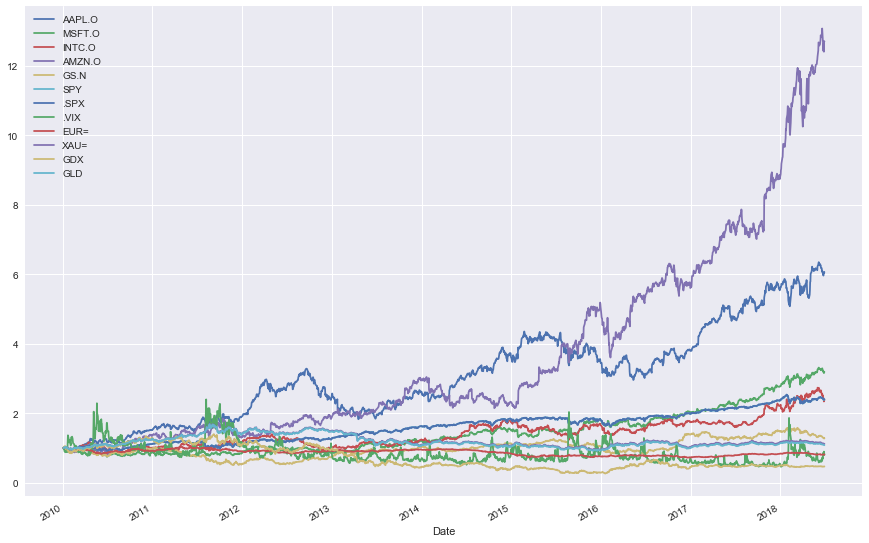

In [11]:
(raw / raw.iloc[0]).plot(figsize=(15,10));

## Modern Portfolio Theory

In [12]:
raw.shift(1).head() # this basically does the row above, so rather than looping thru the whole thing you can shift the row

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-06,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-07,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-08,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [14]:
i

In [15]:
returns.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001727,0.000323,-0.000479,0.005883,0.017525,0.002644,0.003111,-0.035038,-0.002988,-0.001206,0.009595,-0.000911
2010-01-06,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731,0.000704,0.000545,-0.009868,0.003058,0.017589,0.023999,0.016365
2010-01-07,-0.001850,-0.010389,-0.009662,-0.017160,0.019379,0.004212,0.003993,-0.005233,-0.006544,-0.005814,-0.004876,-0.006207
2010-01-08,0.006626,0.006807,0.011103,0.026717,-0.019093,0.003322,0.002878,-0.050024,0.006544,0.003704,0.014959,0.004951


In [16]:
returns.mean() * 252

AAPL.O    0.212359
MSFT.O    0.136648
INTC.O    0.102288
AMZN.O    0.299661
GS.N      0.028592
SPY       0.102928
.SPX      0.103202
.VIX     -0.025888
EUR=     -0.024747
XAU=      0.013162
GDX      -0.089633
GLD       0.009141
dtype: float64

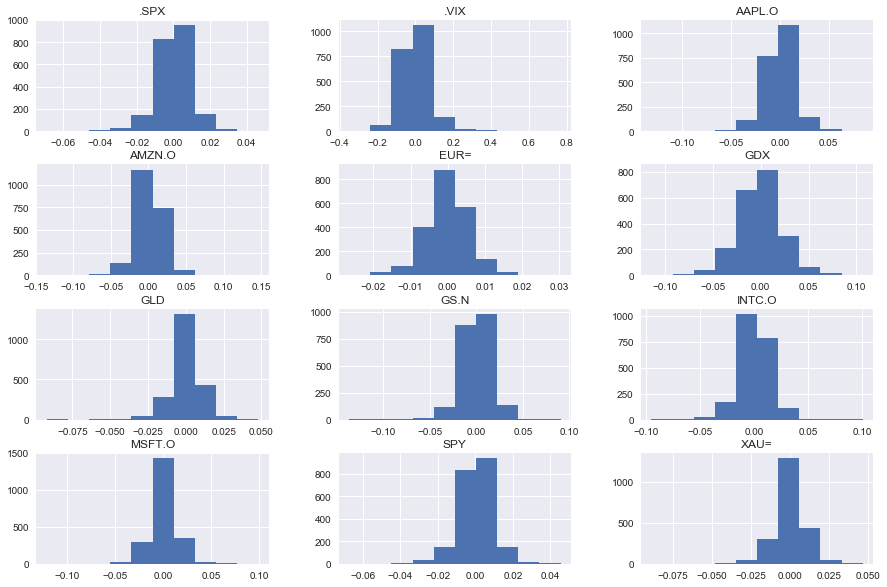

In [19]:
returns.hist(figsize=(15,10));

In [23]:
symbols = ['AAPL.O','MSFT.O']

In [24]:
rets = returns[symbols]

## portfolio returns

In [ ]:
weights = len(symbols) * [1/len(symbols)]

In [26]:
np.dot(rets.mean() * 252, w)

0.17450371039715132

In [27]:
# so thats a 17% return for the portfolio over the year

In [30]:
def portfolio_return(w):
    return np.dot(rets.mean() * 252, w)

In [31]:
portfolio_return(w)

0.17450371039715132

In [32]:
#the shape of the vectors need to match tho, else you'll get an error, so you need two columns in the rets and two in the weights, I think

In [33]:
rets.std() * 252 ** 0.5

AAPL.O    0.252533
MSFT.O    0.225647
dtype: float64

In [34]:
#this is the anualised volatility of the names over the year

In [35]:
rets.corr()

,AAPL.O,MSFT.O
AAPL.O,1.000000,0.411121
MSFT.O,0.411121,1.000000


In [36]:
# so this one shows that they are positively corralated but not that greatly. Obv Apple is 100% corr'd to Apple

In [37]:
np.dot(w, np.dot(rets.cov() * 252, w))

0.040386017951316106

In [38]:
# this is the variance of the names

In [39]:
np.dot(w, np.dot(rets.cov() * 252, w)) ** 0.5

0.20096272776640972

In [40]:
# and this is the volatility of the portfolio

In [41]:
def portfolio_volatility(w):
    return np.dot(w,np.dot(rets.cov() * 252, w)) ** 0.5

In [42]:
portfolio_volatility(w)

0.20096272776640972

In [43]:
np.linspace(0,10,15)

array([ 0.        ,  0.71428571,  1.42857143,  2.14285714,  2.85714286,
        3.57142857,  4.28571429,  5.        ,  5.71428571,  6.42857143,
        7.14285714,  7.85714286,  8.57142857,  9.28571429, 10.        ])

In [44]:
#so thats a vector of numbers, starting at 0, ending at 10 and you want 15 of them

In [45]:
weights = [[s, 1 - s] for s in np.linspace(0,1,50)]

In [46]:
weights

[[0.0, 1.0],
 [0.02040816326530612, 0.9795918367346939],
 [0.04081632653061224, 0.9591836734693877],
 [0.061224489795918366, 0.9387755102040817],
 [0.08163265306122448, 0.9183673469387755],
 [0.1020408163265306, 0.8979591836734694],
 [0.12244897959183673, 0.8775510204081632],
 [0.14285714285714285, 0.8571428571428572],
 [0.16326530612244897, 0.8367346938775511],
 [0.18367346938775508, 0.8163265306122449],
 [0.2040816326530612, 0.7959183673469388],
 [0.22448979591836732, 0.7755102040816326],
 [0.24489795918367346, 0.7551020408163265],
 [0.26530612244897955, 0.7346938775510204],
 [0.2857142857142857, 0.7142857142857143],
 [0.3061224489795918, 0.6938775510204083],
 [0.32653061224489793, 0.6734693877551021],
 [0.3469387755102041, 0.653061224489796],
 [0.36734693877551017, 0.6326530612244898],
 [0.3877551020408163, 0.6122448979591837],
 [0.4081632653061224, 0.5918367346938775],
 [0.42857142857142855, 0.5714285714285714],
 [0.44897959183673464, 0.5510204081632654],
 [0.4693877551020408, 0.53

In [47]:
#so basically one side goes up, one side goes down at the same rate
# you'll see there are two in the middle that match but inversely

In [48]:
portfolio_statistics = [(portfolio_volatility(w), portfolio_return(w)) for w in weights]

In [49]:
ps

NameError: name 'ps' is not defined

In [50]:
portfolio_statistics

[(0.22564733418446956, 0.13664834752355412),
 (0.22321054719895445, 0.13819346437553767),
 (0.22087481391442543, 0.13973858122752125),
 (0.2186433729779704, 0.1412836980795048),
 (0.21651944891212907, 0.14282881493148836),
 (0.21450623546138858, 0.1443739317834719),
 (0.2126068776662639, 0.1459190486354555),
 (0.21082445279130962, 0.14746416548743904),
 (0.2091619502755914, 0.1490092823394226),
 (0.20762225091737932, 0.15055439919140615),
 (0.20620810554749264, 0.15209951604338973),
 (0.20492211348595085, 0.15364463289537325),
 (0.20376670111229753, 0.15518974974735683),
 (0.20274410090901354, 0.15673486659934038),
 (0.20185633135771727, 0.15827998345132394),
 (0.20110517807745587, 0.1598251003033075),
 (0.2004921765917821, 0.16137021715529107),
 (0.20001859709544972, 0.16291533400727465),
 (0.199685431562069, 0.1644604508592582),
 (0.19949338349129292, 0.16600556771124175),
 (0.19944286053919, 0.1675506845632253),
 (0.19953397021029257, 0.16909580141520886),
 (0.19976651871693982, 0.1

In [51]:
portfolio_statistics = np.array(portfolio_statistics)

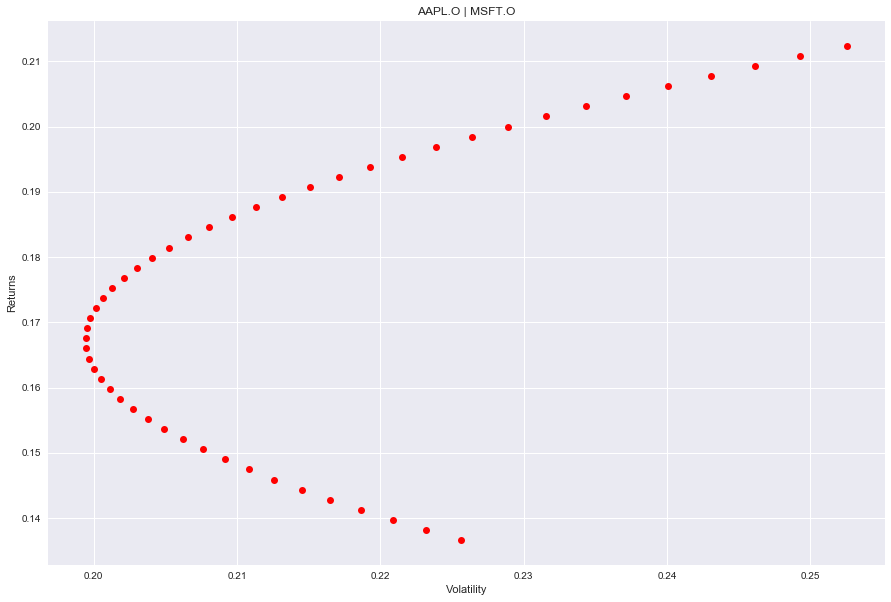

In [62]:
plt.figure(figsize=(15,10))
plt.plot(portfolio_statistics[:,0], portfolio_statistics[:,1], 'ro')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title(' | '.join(symbols));

In [59]:
!conda install -y scipy

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Admin\Miniconda3\envs\newtest

  added / updated specs: 
    - scipy


The following NEW packages will be INSTALLED:

    scipy: 1.1.0-py37h4f6bf74_1

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


##  some funky funtion that I think works out the place in the portfolio where we're most optimised. I think

In [64]:
import scipy.optimize as sco

In [81]:
bounds = ((0,1), (0,1))

In [82]:
constraints = ({'type':'eq', 'fun': lambda weights: sum(weights) - 1})

In [84]:
opt = sco.minimize(portfolio_volatility, w, constraints = constraints, bounds = bounds)

In [85]:
opt

     fun: 0.19944140687877082
     jac: array([0.19942644, 0.1994516 ])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.40516467, 0.59483533])

## Monte Carlo Sims

In [97]:
rets = np.log(raw / raw.shift(1))

In [98]:
symbols = rets.columns[:3]

In [99]:
rets = rets[symbols]

In [100]:
w = len(symbols) * [1/len(symbols)]

In [102]:
portfolio_return(w) # so thats automatically done with three names

0.15043164502022233

In [103]:
rw = np.random.random((10, 3))
rw

array([[0.13977372, 0.81887327, 0.59253634],
       [0.68643314, 0.60103732, 0.40979964],
       [0.92269607, 0.01765697, 0.55666851],
       [0.58319732, 0.09227492, 0.90487447],
       [0.48701427, 0.65907487, 0.79856012],
       [0.48221439, 0.4856837 , 0.64039986],
       [0.59110654, 0.67500745, 0.82133523],
       [0.4828723 , 0.77441218, 0.24752984],
       [0.35882766, 0.90611577, 0.52126332],
       [0.60682264, 0.60333024, 0.1847489 ]])

In [104]:
rw = np.random.random((500, 3))
rw = (rw.T / rw.sum(axis=1)).T

In [105]:
rps = [(portfolio_volatility(w), portfolio_return(w))
        for w in rw]

In [106]:
rps = np.array(rps)

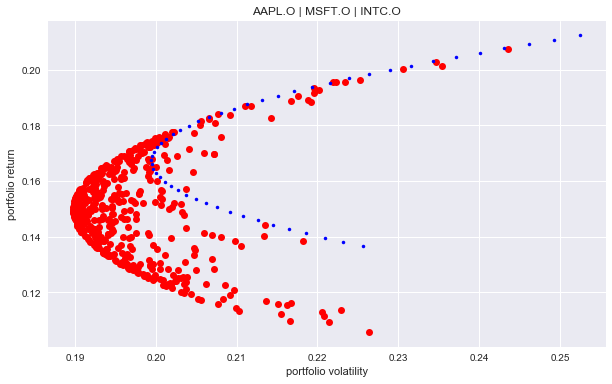

In [111]:
plt.figure(figsize=(10, 6))
plt.plot(rps[:, 0], rps[:, 1], 'ro')
plt.plot(portfolio_statistics[:, 0], portfolio_statistics[:, 1], 'b.')
plt.ylabel('portfolio return')
plt.xlabel('portfolio volatility')
plt.title(' | '.join(symbols));

# session 2

## Rolling statistics

In [112]:
symbol = ['AAPL.O','MSFT.O']

In [150]:
data = pd.DataFrame(raw[symbol])

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
AAPL.O    2138 non-null float64
dtypes: float64(1)
memory usage: 33.4 KB


In [152]:
data['SMA1'] = data[symbol].rolling(window=42).mean()

In [153]:
data['SMA2'] = data[symbol].rolling(window=252).mean()

In [123]:
#data['MAX'] = data[symbol].rolling(window=100).max()
#data['MIN'] = data[symbol].rolling(window=100).min()

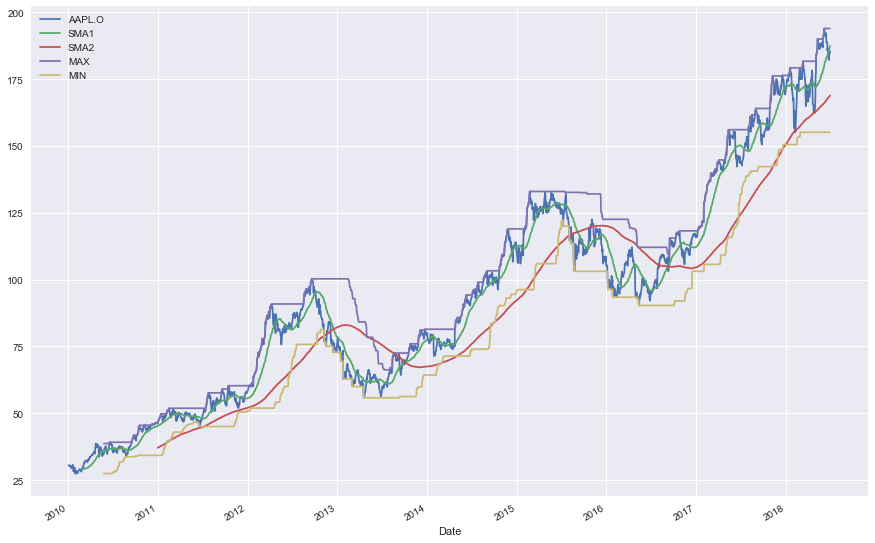

In [128]:
data.plot(figsize=(15,10));

##  Trading strategy

In [154]:
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

In [155]:
data.dropna(inplace=True)

In [134]:
data.head()

,AAPL.O,SMA1,SMA2,MAX,MIN,Position
Date,,,,,,
2010-12-31,46.079954,45.280967,37.120735,46.495668,34.27568,1
2011-01-03,47.081381,45.349708,37.186246,47.081381,34.27568,1
2011-01-04,47.327096,45.412599,37.252521,47.327096,34.27568,1
2011-01-05,47.714238,45.466102,37.322266,47.714238,34.27568,1
2011-01-06,47.675667,45.522565,37.392079,47.714238,34.27568,1


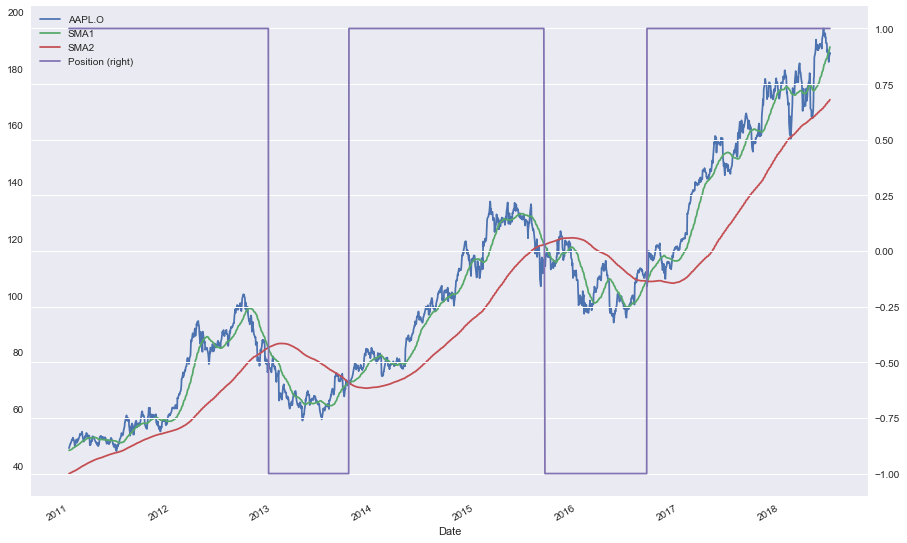

In [136]:
data[[symbol, 'SMA1', 'SMA2', 'Position']].plot(figsize=(15,10),secondary_y = 'Position');

##  Vectorised back testing

In [156]:
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))

In [157]:
data.dropna(inplace=True)

In [141]:
data.head()

,AAPL.O,SMA1,SMA2,MAX,MIN,Position,Returns
Date,,,,,,,
2011-01-03,47.081381,45.349708,37.186246,47.081381,34.27568,1,0.021500
2011-01-04,47.327096,45.412599,37.252521,47.327096,34.27568,1,0.005205
2011-01-05,47.714238,45.466102,37.322266,47.714238,34.27568,1,0.008147
2011-01-06,47.675667,45.522565,37.392079,47.714238,34.27568,1,-0.000809
2011-01-07,48.017095,45.582089,37.462453,48.017095,34.27568,1,0.007136


In [158]:
data['Strategy'] = data['Position'].shift(1) * data['Returns']

In [159]:
data.dropna(inplace=True)

In [145]:
data['Strategy'].head()

Date
2011-01-04    0.005205
2011-01-05    0.008147
2011-01-06   -0.000809
2011-01-07    0.007136
2011-01-10    0.018672
Name: Strategy, dtype: float64

In [146]:
data.head()

,AAPL.O,SMA1,SMA2,MAX,MIN,Position,Returns,Strategy
Date,,,,,,,,
2011-01-04,47.327096,45.412599,37.252521,47.327096,34.27568,1,0.005205,0.005205
2011-01-05,47.714238,45.466102,37.322266,47.714238,34.27568,1,0.008147,0.008147
2011-01-06,47.675667,45.522565,37.392079,47.714238,34.27568,1,-0.000809,-0.000809
2011-01-07,48.017095,45.582089,37.462453,48.017095,34.27568,1,0.007136,0.007136
2011-01-10,48.922094,45.671800,37.537478,48.922094,34.27568,1,0.018672,0.018672


In [160]:
data[['Returns', 'Strategy']].sum()

Returns     1.369073
Strategy    1.738305
dtype: float64

In [148]:
# so this is telling me that the benchmark buy and hold returns are not as good as the SMA strategy

In [162]:
np.exp(data[['Returns', 'Strategy']].sum())

Returns     3.931703
Strategy    5.687692
dtype: float64

In [ ]:
# this is the normalised amounts, so still way better running the SMA, so one dollar in would be 4.6 dollars back

In [163]:
data.dropna(inplace=True)

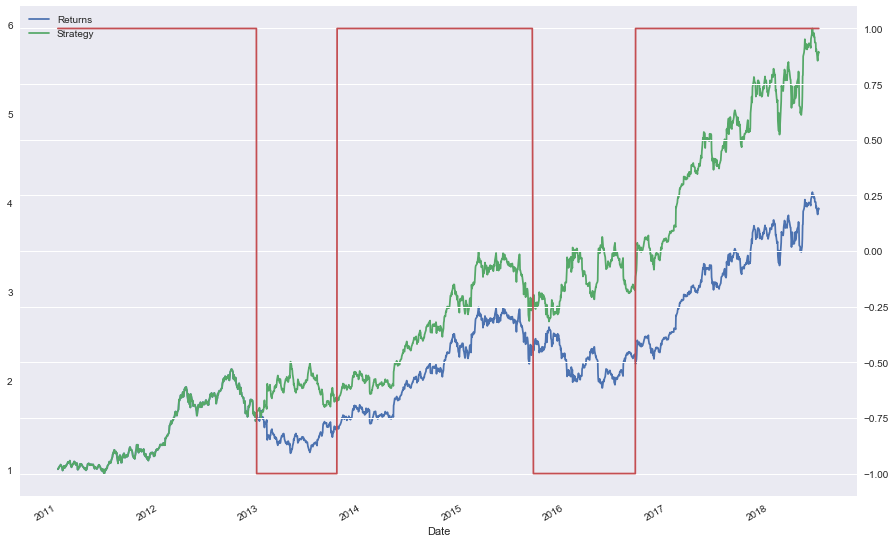

In [170]:
ax = data[['Returns','Strategy']].cumsum().apply(np.exp).plot(figsize=(15,10))
data['Position'].plot(ax = ax, secondary_y='Position'); 
# these are the absolute return values of the benchmark and the strategy with the buy/sell sinal

##  Analysis

In [171]:
#hit ratio

In [172]:
data['Direction'] = np.sign(data['Returns'])

In [173]:
data['Direction'].head()

Date
2011-01-04    1.0
2011-01-05    1.0
2011-01-06   -1.0
2011-01-07    1.0
2011-01-10    1.0
Name: Direction, dtype: float64

In [174]:
#this also shows what the trend of the name is, trending up or down

In [175]:
data.head()

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy,Direction
Date,,,,,,,
2011-01-04,47.327096,45.412599,37.252521,1,0.005205,0.005205,1.0
2011-01-05,47.714238,45.466102,37.322266,1,0.008147,0.008147,1.0
2011-01-06,47.675667,45.522565,37.392079,1,-0.000809,-0.000809,-1.0
2011-01-07,48.017095,45.582089,37.462453,1,0.007136,0.007136,1.0
2011-01-10,48.922094,45.671800,37.537478,1,0.018672,0.018672,1.0


In [181]:
hit_ratio = data['Position'].shift(1) == data['Direction']

In [177]:
# this would be like your market timing, how long is your longest drawdown 
# ( from there you could also guestimate using the daily normalised returns what your dollar drawdown would be)

In [182]:
hit_ratio.value_counts()

True     979
False    906
dtype: int64

In [192]:
# drawdown ? 
data['CUM_STRAT'] = data['Strategy'].cumsum().apply(np.exp)
data['MAX_STRAT'] = data['CUM_STRAT'].cummax()
data['DRAWDOWN'] = data['CUM_STRAT'] - data['MAX_STRAT']

In [194]:
(data['MAX_STRAT'] - data['CUM_STRAT'])

Date
2011-01-04    0.000000
2011-01-05    0.000000
2011-01-06    0.000819
2011-01-07    0.000000
2011-01-10    0.000000
2011-01-11    0.002473
2011-01-12    0.000000
2011-01-13    0.000000
2011-01-14    0.000000
2011-01-18    0.023758
2011-01-19    0.029250
2011-01-20    0.047941
2011-01-21    0.066025
2011-01-24    0.033468
2011-01-25    0.021483
2011-01-26    0.014049
2011-01-27    0.015991
2011-01-28    0.037564
2011-01-31    0.027794
2011-02-01    0.010468
2011-02-02    0.012623
2011-02-03    0.015293
2011-02-04    0.006008
2011-02-07    0.000000
2011-02-08    0.000000
2011-02-09    0.000000
2011-02-10    0.010984
2011-02-11    0.003975
2011-02-14    0.000000
2011-02-15    0.000000
                ...   
2018-05-18    0.114608
2018-05-21    0.074050
2018-05-22    0.088491
2018-05-23    0.051620
2018-05-24    0.058072
2018-05-25    0.044860
2018-05-29    0.065754
2018-05-30    0.078044
2018-05-31    0.097401
2018-06-01    0.000000
2018-06-04    0.000000
2018-06-05    0.000000
2018-0

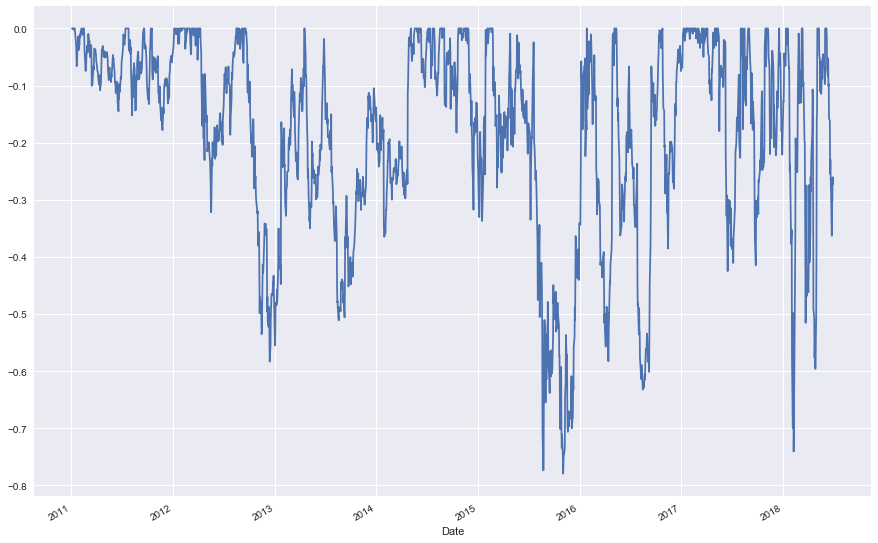

In [199]:
data['DRAWDOWN'].plot(figsize=(15,10));


In [202]:
mdd = (-data['DRAWDOWN']).idxmax()
mdd

Timestamp('2015-11-03 00:00:00')

In [204]:
data['DRAWDOWN'].loc[mdd]

-0.7796117265886258

In [205]:
newmax = data[data['MAX_STRAT'] == data['CUM_STRAT']].index

In [210]:
drawdownperiods = newmax[1:] - newmax[:-1]

In [211]:
drawdownperiods

TimedeltaIndex([ '1 days',  '2 days',  '3 days',  '2 days',  '1 days',
                 '1 days', '24 days',  '1 days',  '1 days',  '5 days',
                ...
                 '3 days', '53 days',  '3 days',  '1 days',  '1 days',
                 '1 days', '22 days',  '3 days',  '1 days',  '1 days'],
               dtype='timedelta64[ns]', name='Date', length=198, freq=None)

In [209]:
max(drawdownperiods)

Timedelta('381 days 00:00:00')

## formulate and backtest a momenttum trading strategy which goes long when the **mean of the previous $M$ ( log )** returns is positive and short when it is negative

In [212]:
data

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy,Direction,MAX_STRAT,CUM_STRAT,DRAWDOWN
Date,,,,,,,,,,
2011-01-04,47.327096,45.412599,37.252521,1,0.005205,0.005205,1.0,1.005219,1.005219,0.000000
2011-01-05,47.714238,45.466102,37.322266,1,0.008147,0.008147,1.0,1.013442,1.013442,0.000000
2011-01-06,47.675667,45.522565,37.392079,1,-0.000809,-0.000809,-1.0,1.013442,1.012623,-0.000819
2011-01-07,48.017095,45.582089,37.462453,1,0.007136,0.007136,1.0,1.019874,1.019874,0.000000
2011-01-10,48.922094,45.671800,37.537478,1,0.018672,0.018672,1.0,1.039096,1.039096,0.000000
2011-01-11,48.805665,45.752106,37.613397,1,-0.002383,-0.002383,-1.0,1.039096,1.036623,-0.002473
2011-01-12,49.202808,45.846544,37.689230,1,0.008104,0.008104,1.0,1.045059,1.045059,0.000000
2011-01-13,49.382808,45.974605,37.766469,1,0.003652,0.003652,1.0,1.048882,1.048882,0.000000
2011-01-14,49.782807,46.115575,37.847280,1,0.008067,0.008067,1.0,1.057378,1.057378,0.000000
